# NDEToolkit

A full Ultrasound analysis library

In [2]:
import NDEToolkit as ndt

## I/O functions

Set of methods and functions that provide an easy and efficient way to read .tiff files as numpy ndarrays and to write ndarrays as .tiff files

### napari_read_tiff

This function reads a tiff file given the path and returns an ndarray, we can specify if the path is a folder containing several tiff frames so it would be read as a volume

In [2]:
from pathlib import Path
import napari


In [5]:

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

tiff_folder = folder_to_read /   r'c7_10MHz_backswall_freq_dom_pruebas'

data = ndt.napari_read_tiff(tiff_folder,folder=True)
data.shape

(221, 224, 1082)

In [6]:
viewer = napari.view_image(data)

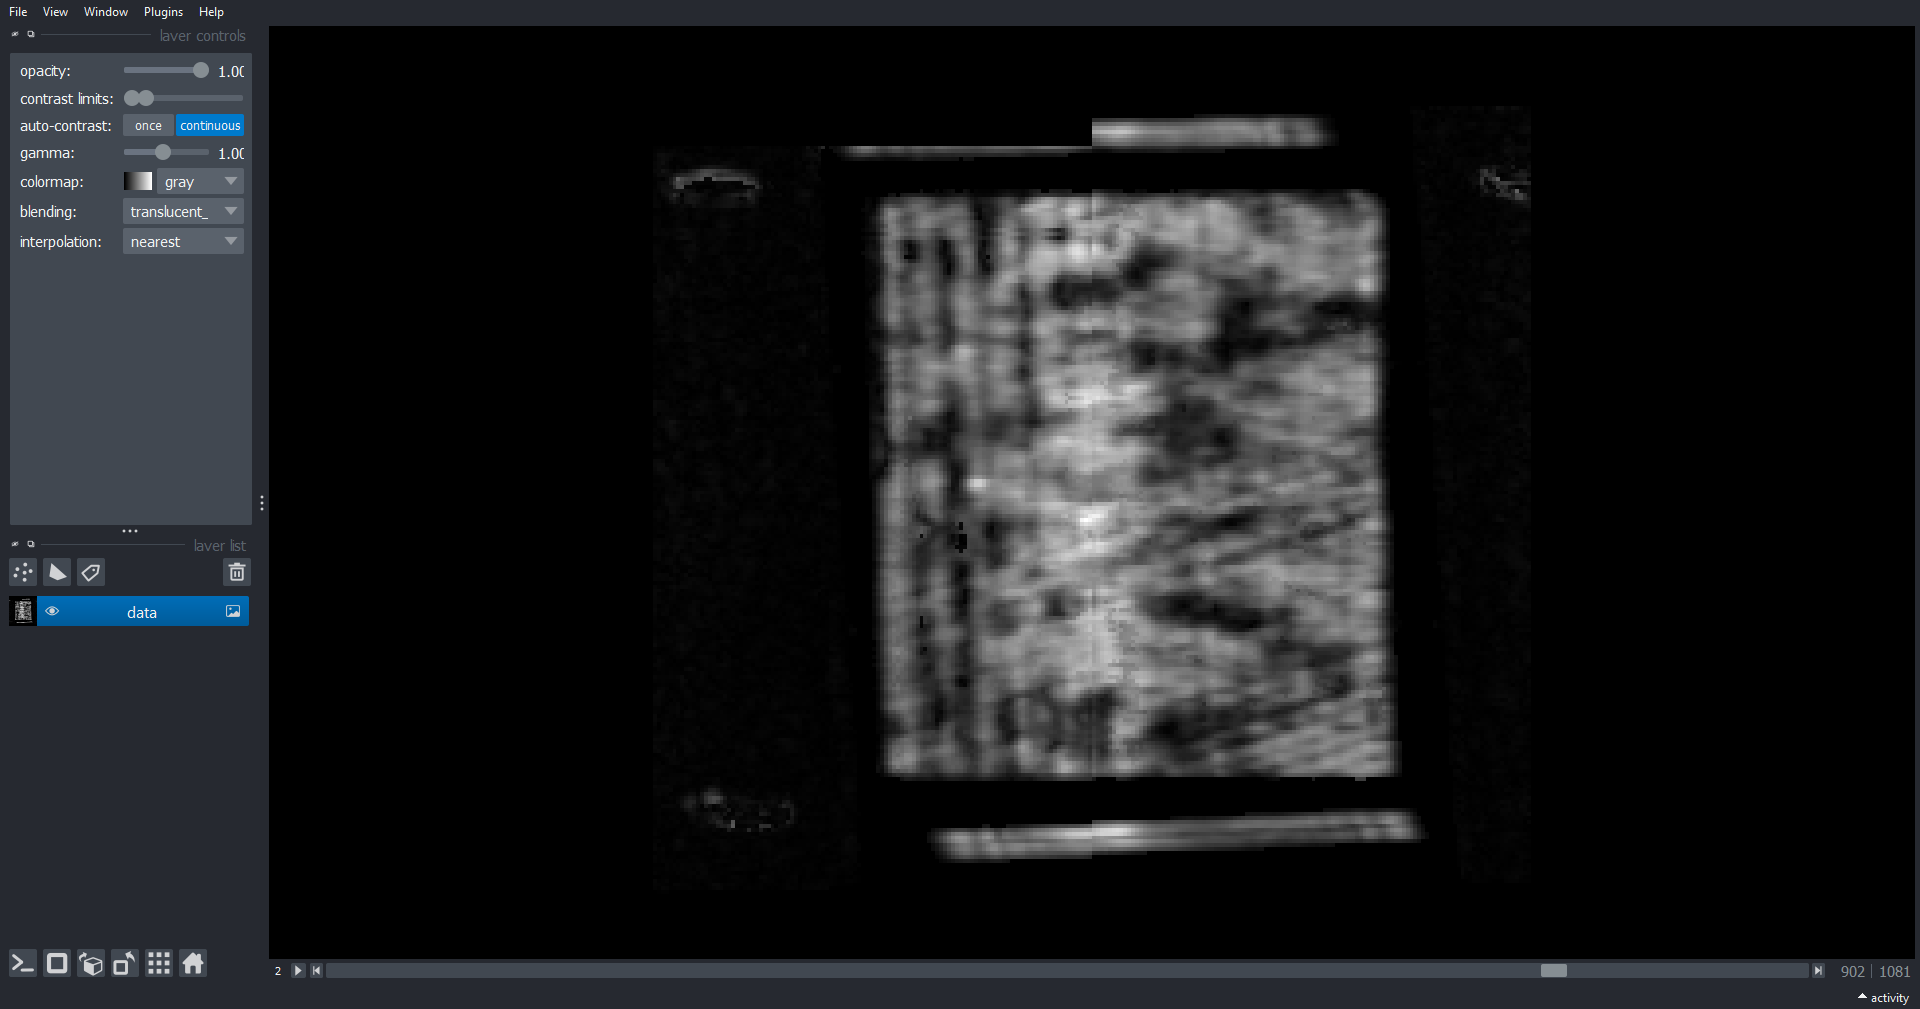

In [7]:
napari.utils.nbscreenshot(viewer)

### write_tiff

This functions writes a ndarray in a tiff file in the specified path

In [ ]:
from pathlib import Path

In [9]:
folder_to_write = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

filename = folder_to_read /   r'c7_10MHz_backswall_freq_dom_pruebas.tiff'

data = ndt.write_tiff(data,filename)

## RfAligner

Class with RF singal aligment functions

In [2]:
aligner = ndt.RfAligner()

### Align a RF signal

align1D function aligns a given RF signal arround a certain given point. Also a security parameter must be passed to prevent loosing info at the left of signals envelope peak. There is also a function that aligns the envelope named envelope_align1D, and a 3D version of each of these functions

(0.0, 12.0)

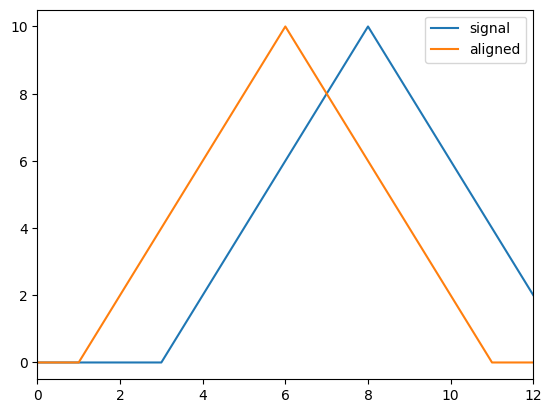

In [3]:
import numpy as np
import matplotlib.pyplot as plt

signal = np.array([0,0,0,0,2,4,6,8,10,8,6,4,2,0,0,0,0,0,0,0,0,0,0,0,0])

aligned = aligner.align1D(signal,6,7)

plt.plot(signal)
plt.plot(aligned)
plt.legend(["signal","aligned"])
plt.xlim(0,12)

### Align a volume using envelope

In [3]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes')

tiff_folder = folder_to_read /   r'volumen.tif'

data = ndt.napari_read_tiff(tiff_folder,folder=False)
data.shape

(97, 501, 416)

In [4]:
aligned_envelope = aligner.align(data,50,5)

In [5]:
import napari

viewer = napari.view_image(aligned_envelope)
viewer.add_image(data)

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


<Image layer 'data' at 0x1aab5b10610>

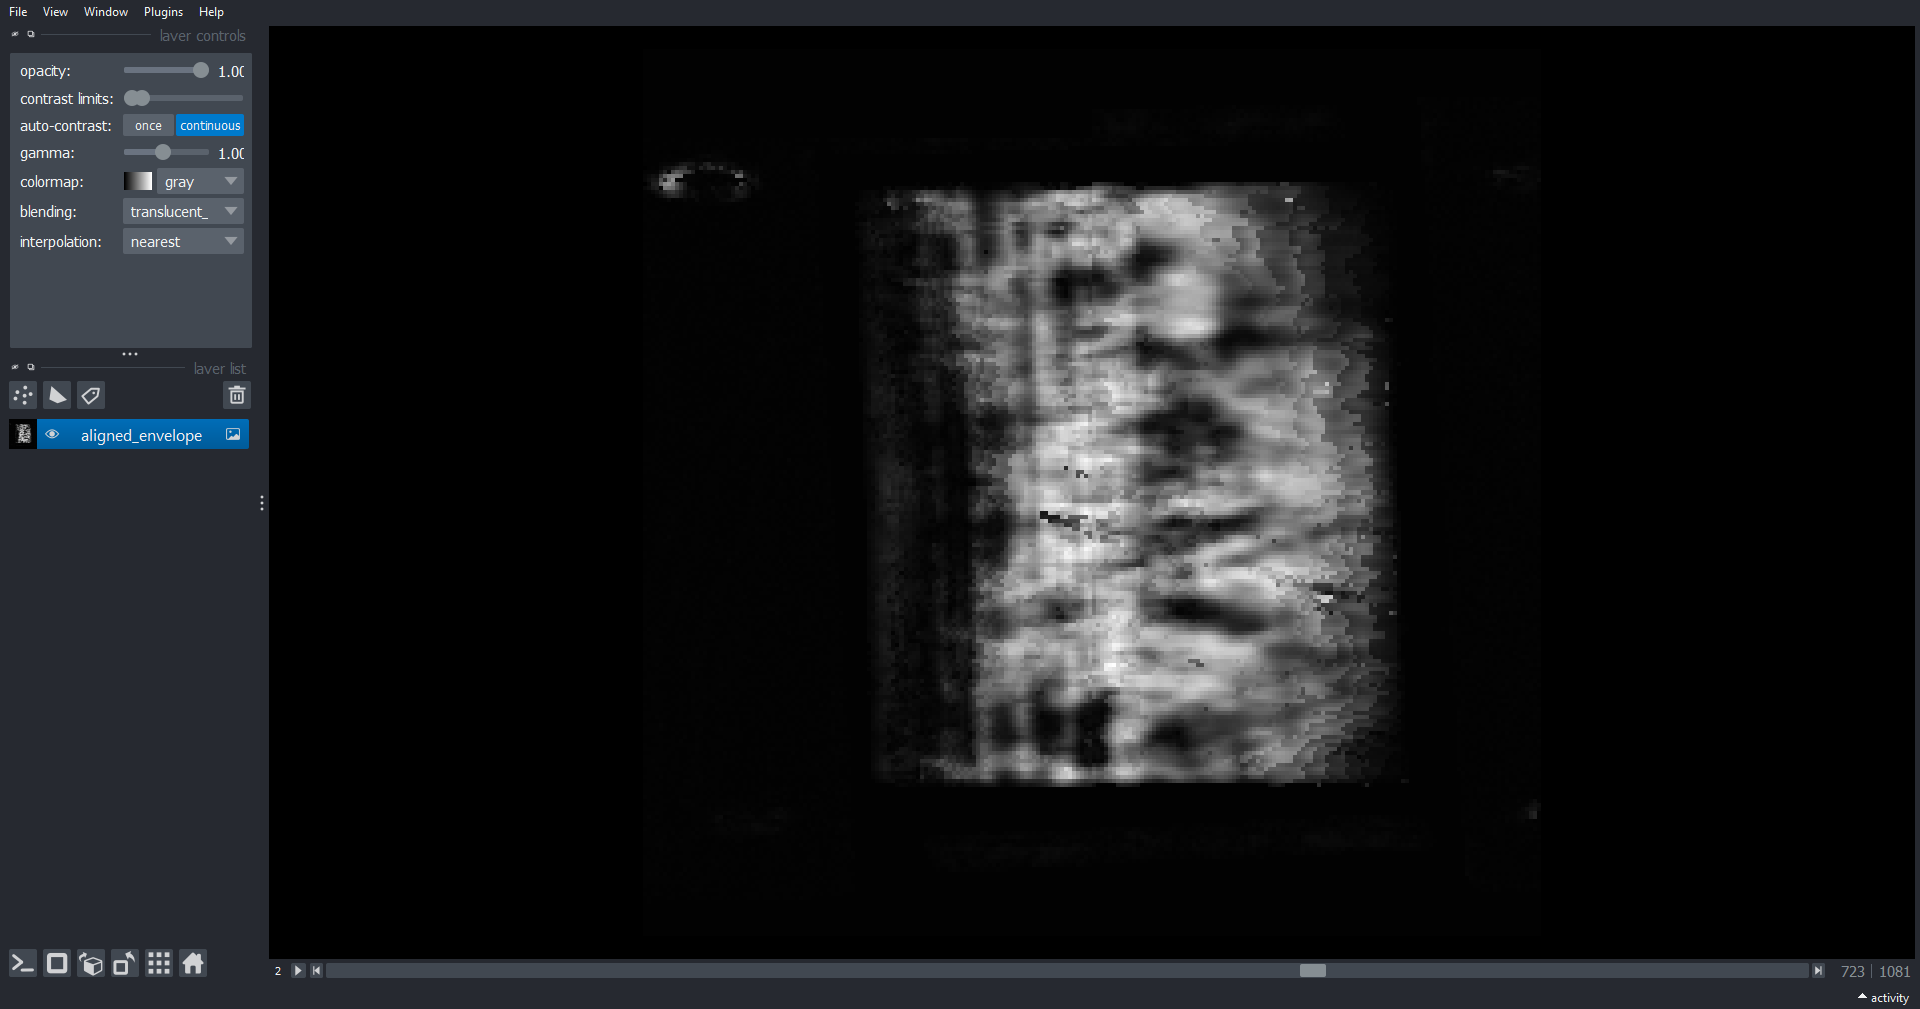

In [8]:
napari.utils.nbscreenshot(viewer)

## RfAnalyze

Class unifying access to essential functions in RF signal analysis as

In [42]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes')

tiff_folder = folder_to_read /   r'volumen.tif'

data = ndt.napari_read_tiff(tiff_folder,folder=False)
data.shape

(97, 501, 416)

In [43]:
rfa = ndt.RfAnalyze(data) #Signal can be passed as a parameter to the constructor

rfa.signal(data) #Signal can also be loaded later with this method

### Analytic signal, aplying hilbert transform to a RF signal 

To compute the analytic signal, after loading a RF signal, RfAnalyze.analityc function must be used.

In [44]:
analytic = rfa.analytic()

### Envelope

Computing the envelope is as easy as using RfAnalyze.envelope function

In [45]:
envelope = rfa.envelope()

Using saved


In [46]:
import napari

viewer = napari.view_image(envelope)

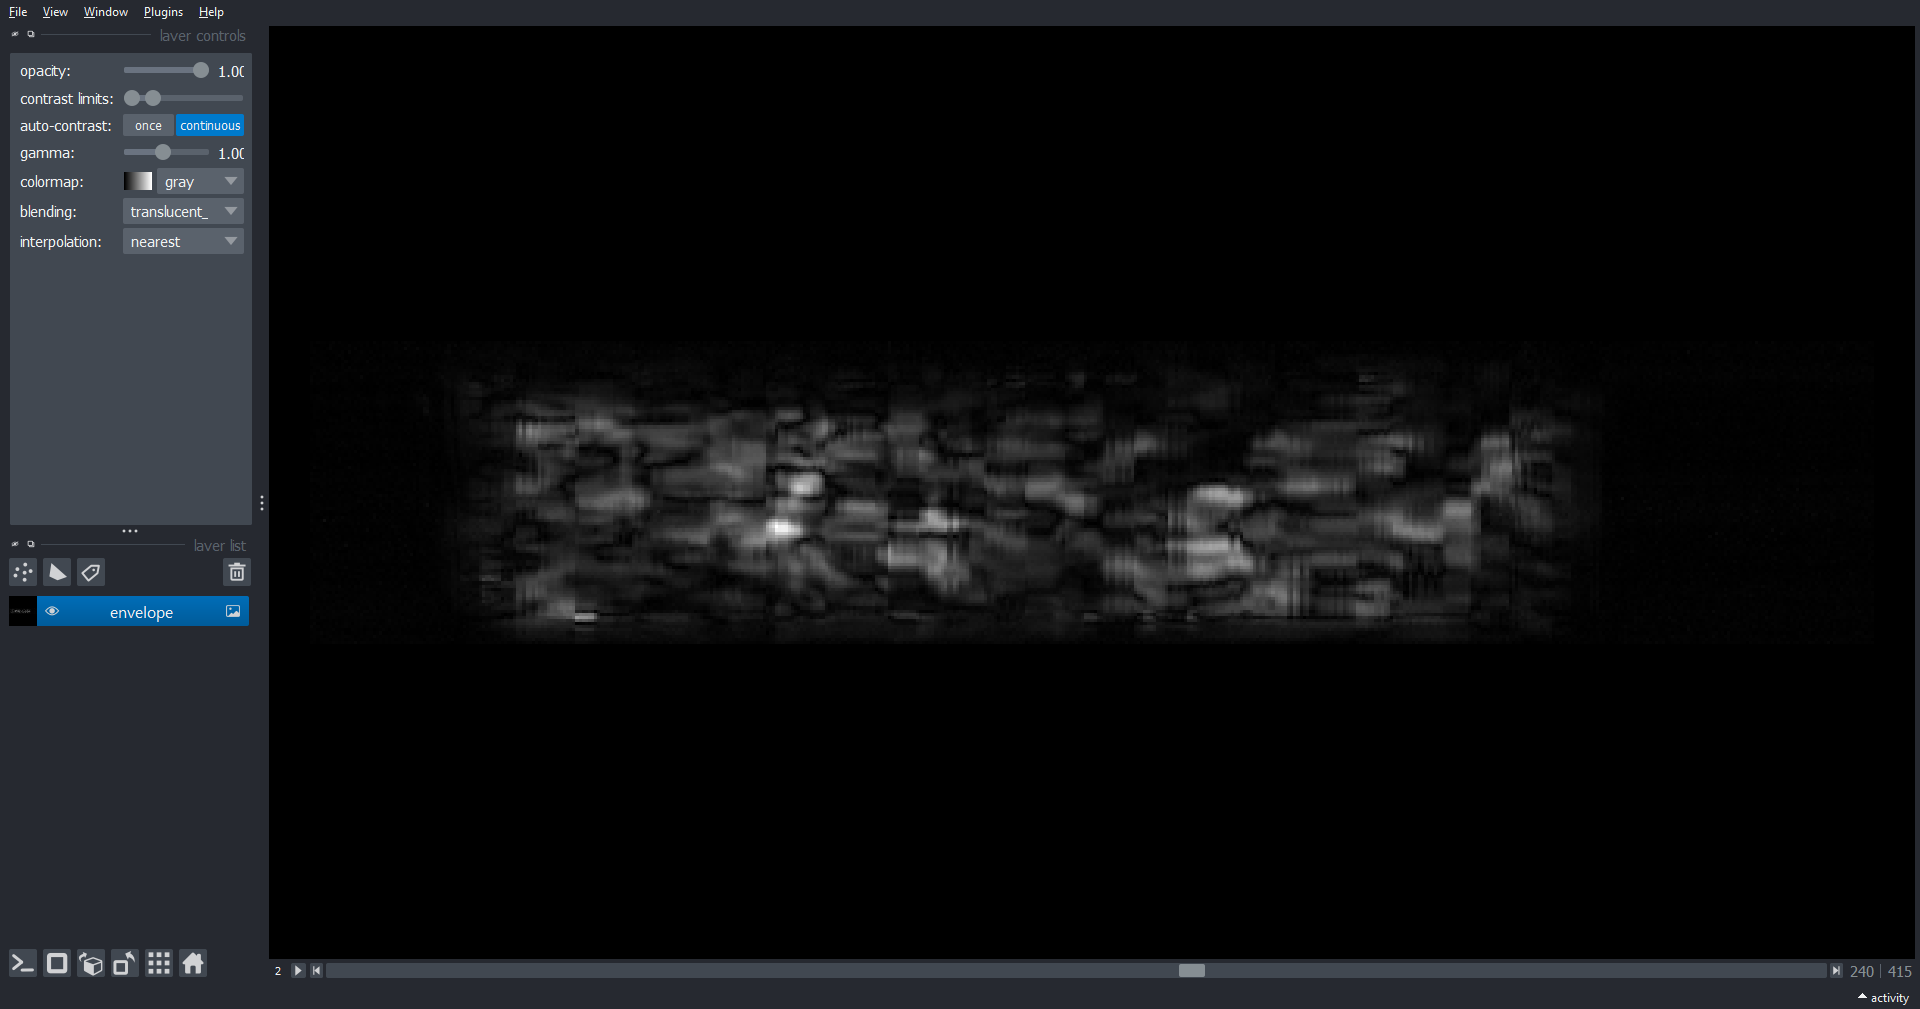

In [47]:
napari.utils.nbscreenshot(viewer)

### Instantaneos Phase

Computing the Inst Phase is as easy as using RfAnalyze.inst_phase function

In [51]:
inst_phase = rfa.inst_phase()

Using saved


In [54]:
import napari

viewer = napari.view_image(inst_phase)

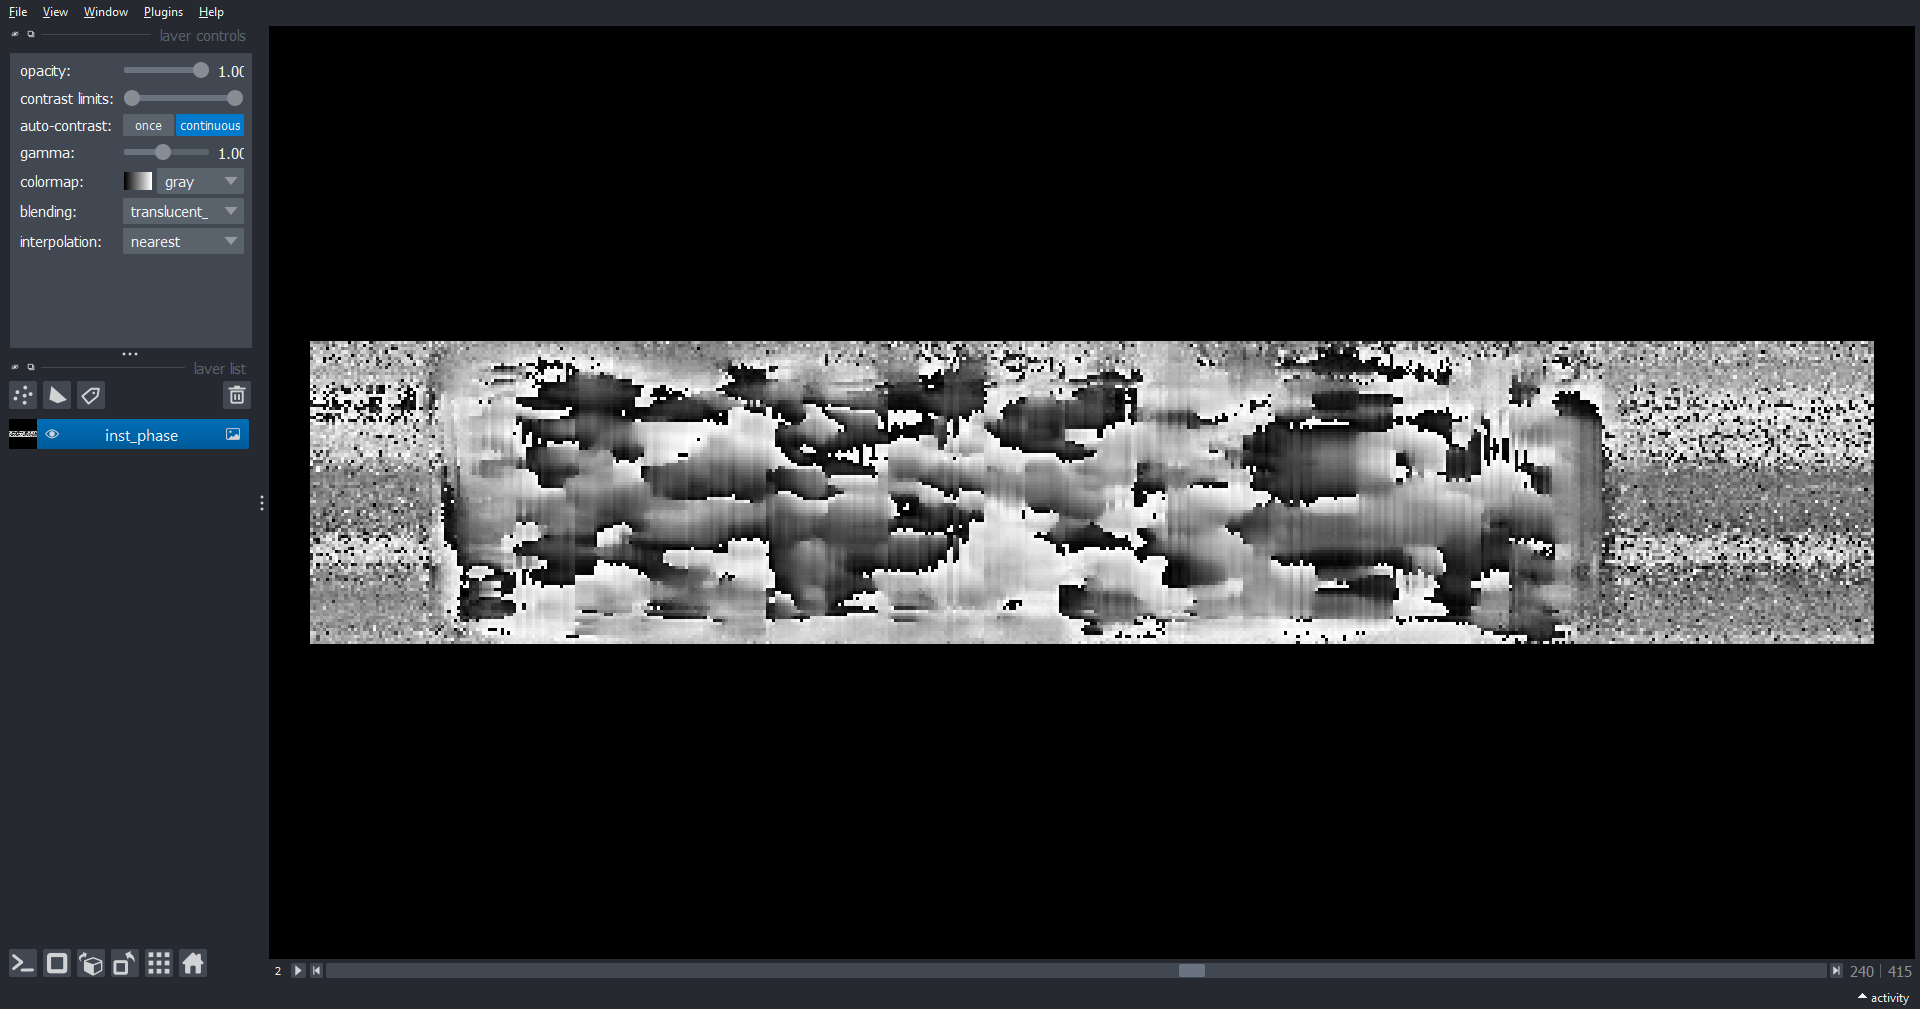

In [55]:
napari.utils.nbscreenshot(viewer)

### Instantaneous Frequency

Computing the Inst Freq is as easy as using RfAnalyze.inst_freq function

In [48]:
inst_freq = rfa.inst_freq()

Using saved


In [49]:
import napari

viewer = napari.view_image(inst_freq)

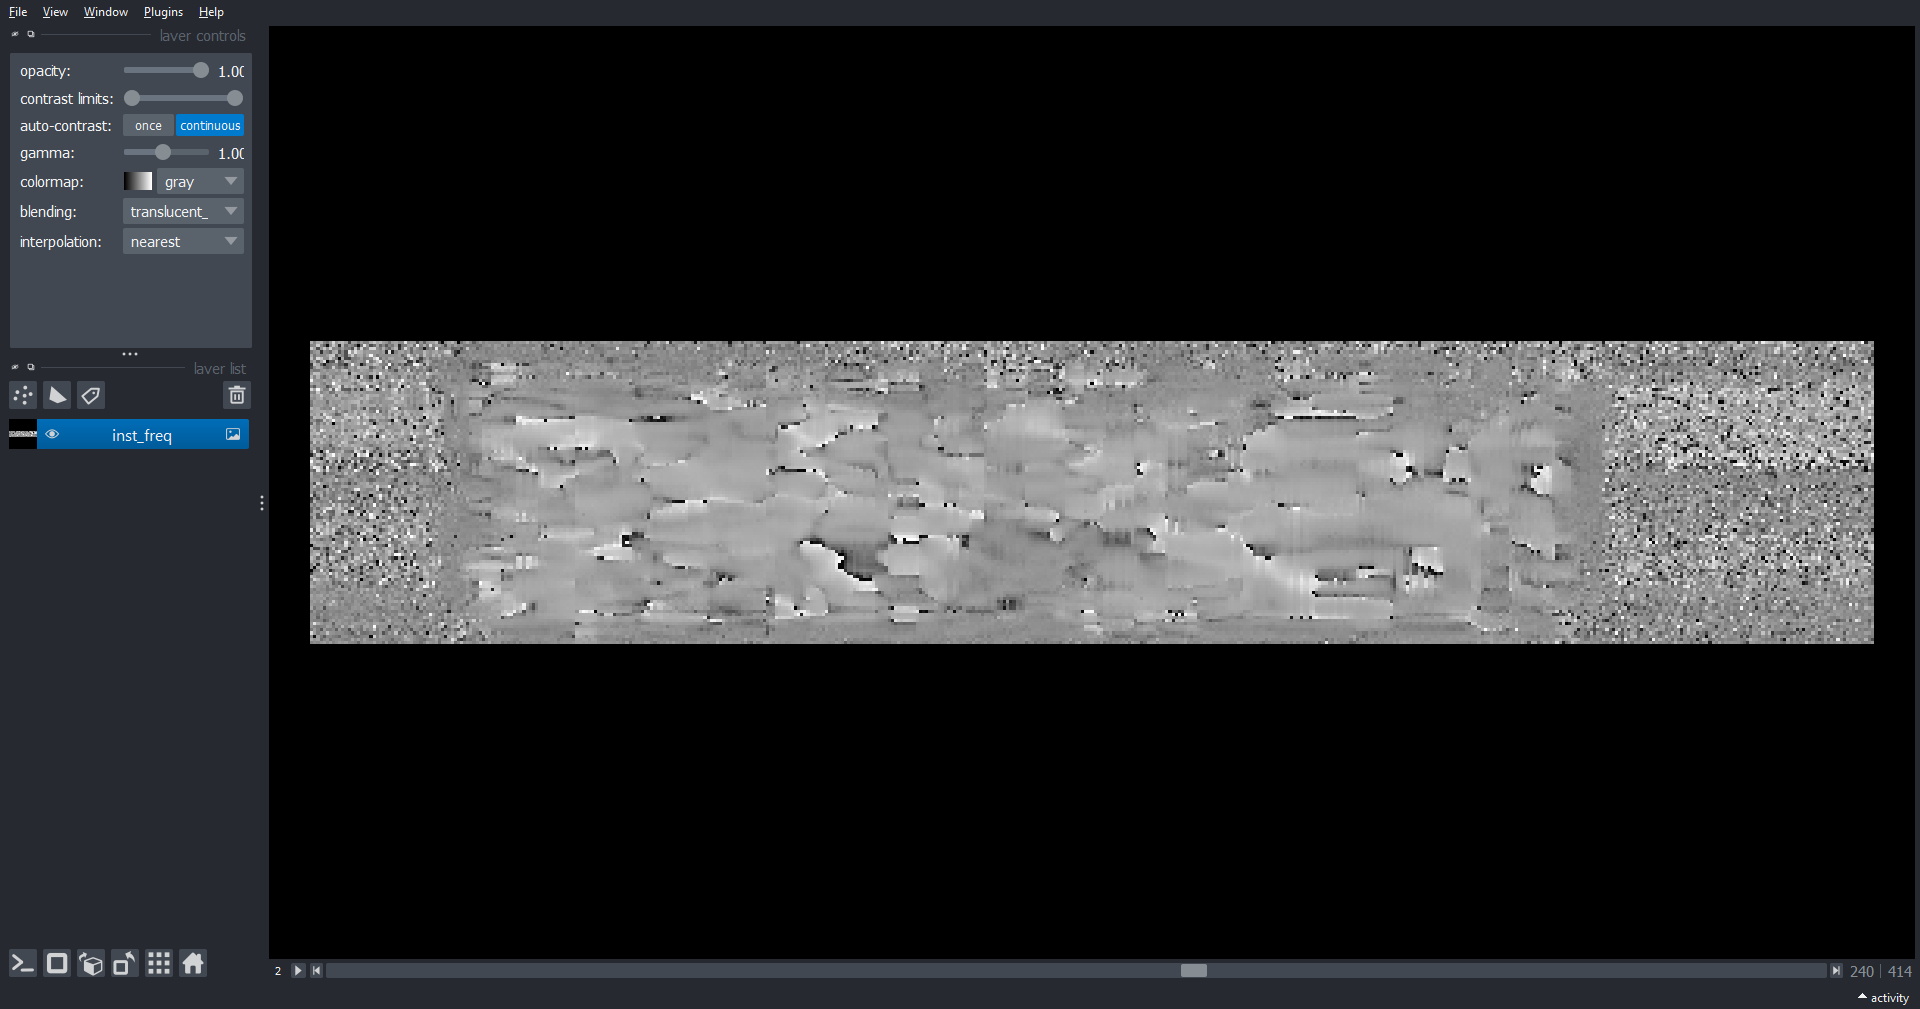

In [50]:
napari.utils.nbscreenshot(viewer)

## FFTAnalyze

Class that provides the functions and methods needed for a full Frequency Domain Analysis

In [58]:
ff = ndt.FFTAnalyze()

In [56]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

tiff_folder = folder_to_read /   r'20210407_phase_vols/0_phase_10MHz/COUPON7_PHASE_10MHz'

data = ndt.napari_read_tiff(tiff_folder,folder=True)
data.shape

(221, 224, 1082)

### Reference Signal

An essential element to perform a proper Frequency Domain it's a reference FFT that will be used to normalize the other signals.

To compute this FFT reference signal, FFTAnalyze provides set_ref_window, wich retunr a refence FFT given a RF signal, and the window boundaries

(800.0, 1000.0)

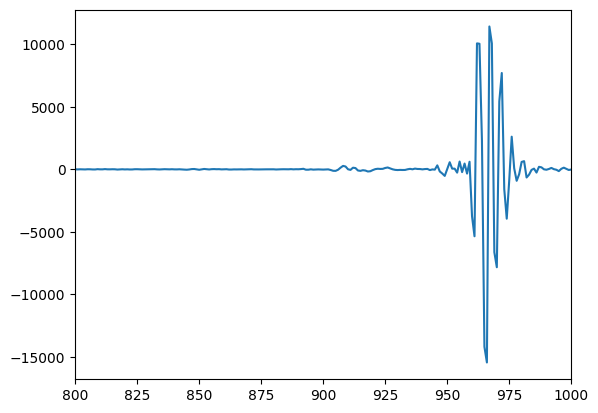

In [61]:
import matplotlib.pyplot as plt
#Define ref  rfsignal
ref_signal = data[100,50,:]
plt.plot(ref_signal)
plt.xlim(800,1000)

(800.0, 1000.0)

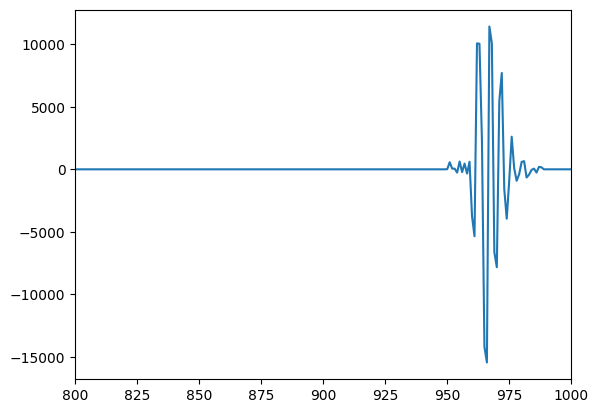

In [62]:
#Ref FFT computing
ref = ff.set_ref_window(ref_signal,950,990)
plt.plot(ref)
plt.xlim(800,1000)

### Backwall FFT

To compute a backwall windowed FFT to a signal or a volume, FFTAnalyze provides this functions:

- backwall_window: Returns a signal where every point is 0 excepting the ones inside a window computed knowing thickness of the piece, sound velocity and sampling frequency
- backwall_window_volume: backwall_window function along a volume
- fourier: Given a windowed signal and the sampling frequency, returns the fercuencys, the reference FFT and the signals FFT
- fourier_volume: fourier function along a volume

c:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\repositorio\UltraCODE\4_Processing\Composite_porosity_UT\NDEToolkit.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  result[self.left:self.right] = signal[int(x_out-np.floor((self.right-self.left)/2)):int(x_out+np.floor((self.right-self.left)/2))] #copy window from signal to result


(800.0, 1000.0)

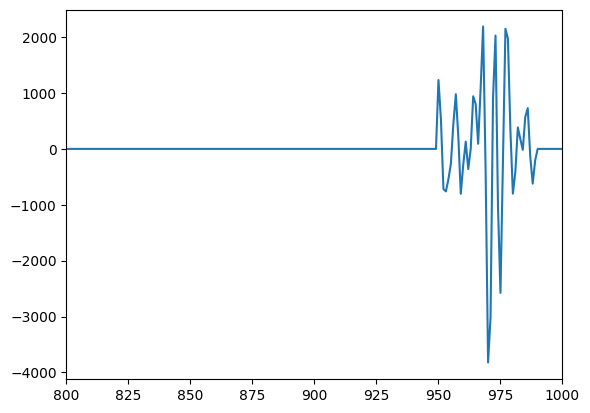

In [82]:
#backwall window volume
analyze = ndt.RfAnalyze(data)
analytic = analyze.analytic()
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backwall_signal = ff.backwall_window_volume(analytic,lam_thickness,c_mat,fs)
plt.plot(backwall_signal[135,145])
plt.xlim(800,1000)

In [92]:
## FFT on windowed signal
frecs,ref_fourier,signal_fourier = ff.fourier_volume(backwall_signal,fs)

To normalize the FFT signal, FFTAnalyze provides normalize function, wich uses the stored reference signal to normalize the FFT signal given as input

(2.0, 13.0)

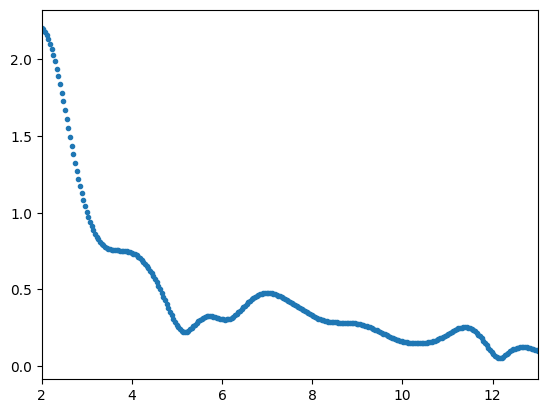

In [93]:
normalized = ff.normalize(signal_fourier)
plt.plot(frecs,normalized[177,178],'.')
plt.xlim(2,13)

### Backscattered FFT

To compute a backscattered windowed FFT to a signal or a volume, FFTAnalyze provides this functions:

- backscattered_window: Returns a signal where every point is 0 excepting the ones inside a window also given as input
- backscattered_window_volume: backwall_window function along a volume
- fourier: Given a windowed signal and the sampling frequency, returns the fercuencys, the reference FFT and the signals FFT
- fourier_volume: fourier function along a volume

c:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\repositorio\UltraCODE\4_Processing\Composite_porosity_UT\NDEToolkit.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  cropped[mask1:mask2] = signal[mask1:mask2]


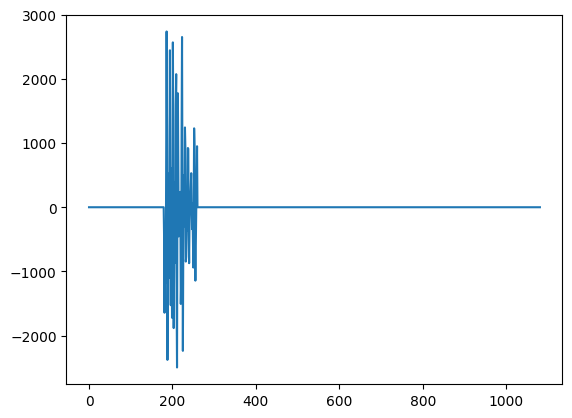

In [85]:
#basckscattered window volume
ff1,ff2 = 180,260
analyze = ndt.RfAnalyze(data)
analytic = analyze.analytic()
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backscattered_signal = ff.backscattered_window_volume(analytic,ff1,ff2)
plt.plot(backscattered_signal[177,178])

In [86]:
## FFT on windowed signal
frecs,ref_fourier,signal_fourier = ff.fourier_volume(backscattered_signal,fs)

To normalize the FFT signal, FFTAnalyze provides normalize function, wich uses the stored reference signal to normalize the FFT signal given as input

(2.0, 13.0)

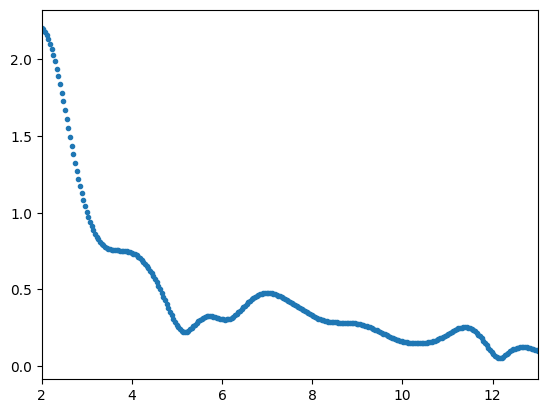

In [94]:
normalized = ff.normalize(signal_fourier)
plt.plot(frecs,normalized[177,178],'.')
plt.xlim(2,13)

## Aspect Ratio

Aspect ratio distortion is a common issue in US analysis, which can make it difficult to understand the results.

To solve this problem, NDEToolkit includes class that returns a samples proportions to the original ratio of the measured object given an image or volume and the original proportions

In [9]:
folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp') 

ruta_data1 = folder_to_read /   'c7_10MHz_backswall_freq_dom_pruebas'

data = ndt.napari_read_tiff(ruta_data1,folder=True)
image = data[:,:,911]

In [11]:
a = ndt.AspectRatio()

In [12]:
resized = a.reshape(221,74,data)
print(data.shape)
print(resized.shape)

(221, 224, 1082)
(668, 224, 1082)


## Gate Manager

In [6]:
gm = ndt.gateManager()

Class to compute typical US gates

In [3]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

tiff_folder = folder_to_read /   r'20210407_phase_vols/0_phase_10MHz/COUPON7_PHASE_10MHz'

data = ndt.napari_read_tiff(tiff_folder,folder=True)
data.shape

(221, 224, 1082)

### If Gate

Using saved


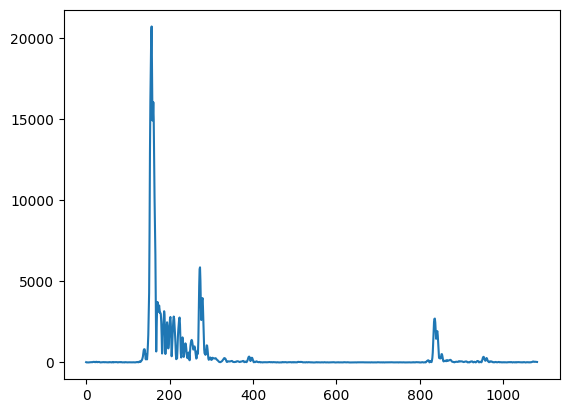

In [4]:
import matplotlib.pyplot as plt
signal = data[177,178]
analyze = ndt.RfAnalyze(signal)
analytic = analyze.analytic()
envelope = analyze.envelope()
plt.plot(envelope)

#### Max method

Returns the value of the highest peak above the limit in the gate

In [7]:
gm.ifGate(envelope,150,200,lim=50,method="max")

20731.387531211683

#### First peak method

Returns the value of the first peak above the limit in the gate

In [8]:
gm.ifGate(envelope,150,200,lim=50,method="first")

20731.387531211683

##### Negative Gate

Same as the ones above but the if function is activated if the peaks are under the limit

In [9]:
gm.negativeGate(envelope,800,900,lim=3000, method = 'first')

18.695057940468562